In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

df = pd.read_csv("UserInteractions_data.csv")

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['DateMonth'] = df['Timestamp'].dt.to_period('D')
df['Product_ID'].replace('-', np.nan, inplace=True)

user_behavior = df.groupby('Interaction_Type').agg({'Quantity': 'mean', 'Payment_Method': 'first'})

df['IsPurchase'] = df['Interaction_Type'].apply(lambda x: 1 if x == 'purchase' else 0)
features = df[['Product_ID', 'Quantity']]
target = df['IsPurchase']


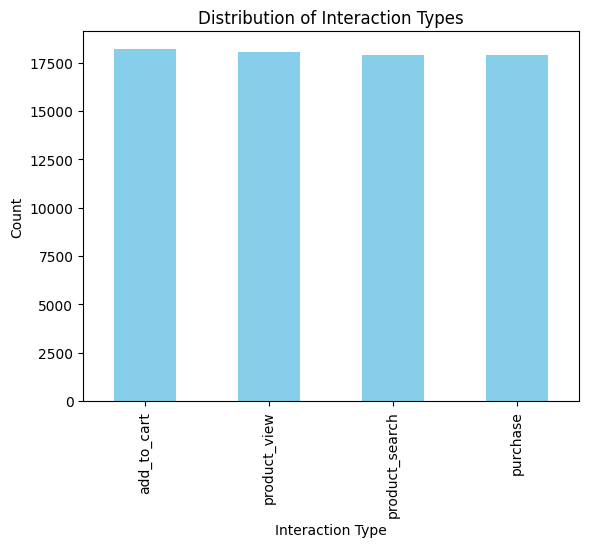

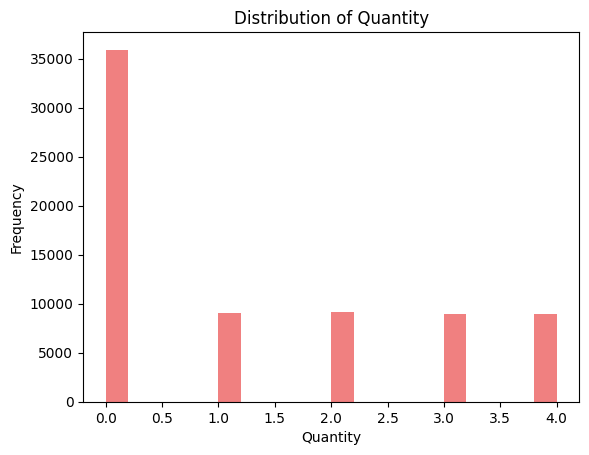

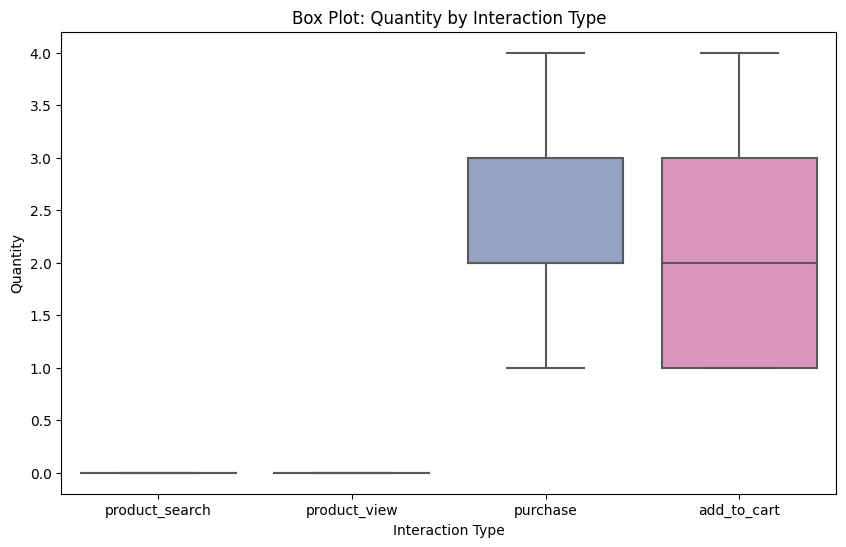

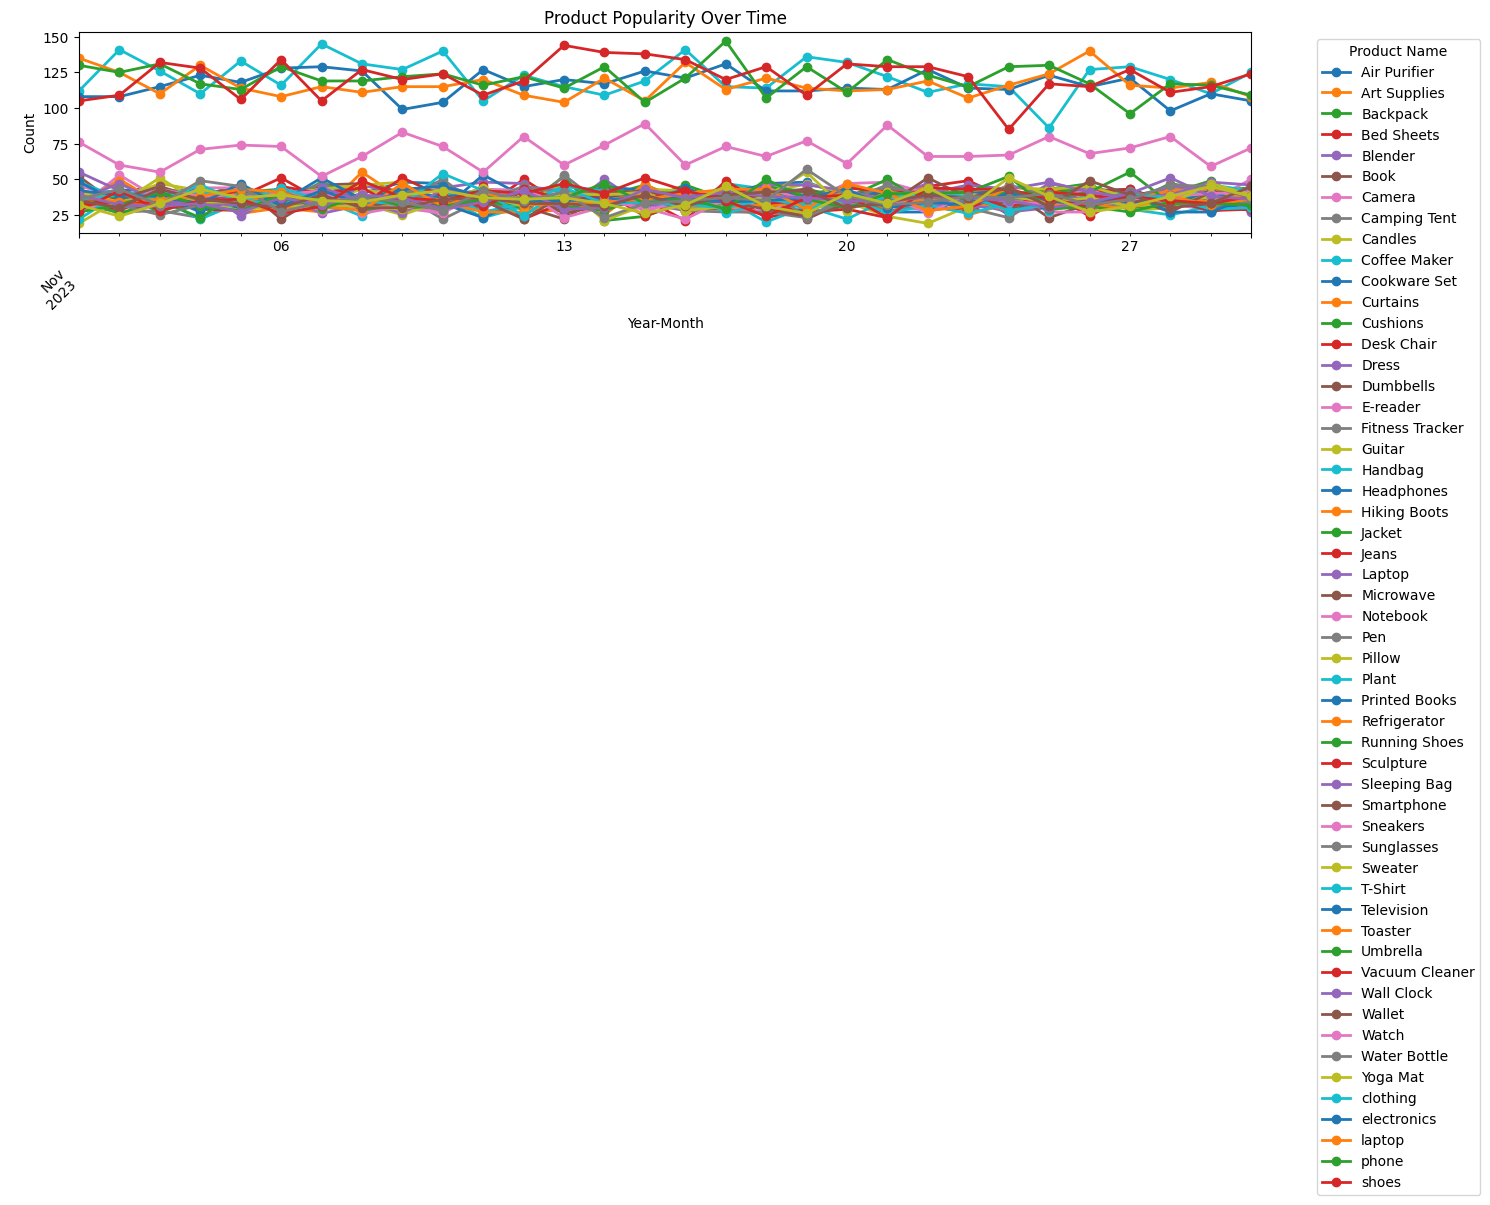

In [2]:
import matplotlib.pyplot as plt

interaction_counts = df['Interaction_Type'].value_counts()
interaction_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Interaction Types')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.show()

df['Quantity'].plot(kind='hist', bins=20, color='lightcoral')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Interaction_Type', y='Quantity', data=df, palette='Set2')
plt.title('Box Plot: Quantity by Interaction Type')
plt.xlabel('Interaction Type')
plt.ylabel('Quantity')
plt.show()

product_popularity = df.groupby(['DateMonth', 'Product_Name']).size().unstack(fill_value=0)
product_popularity.plot(figsize=(15, 8), marker='o', linewidth=2)
plt.title('Product Popularity Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Accuracy: 0.7497222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84     10898
           1       0.48      0.44      0.46      3502

    accuracy                           0.75     14400
   macro avg       0.65      0.64      0.65     14400
weighted avg       0.74      0.75      0.75     14400



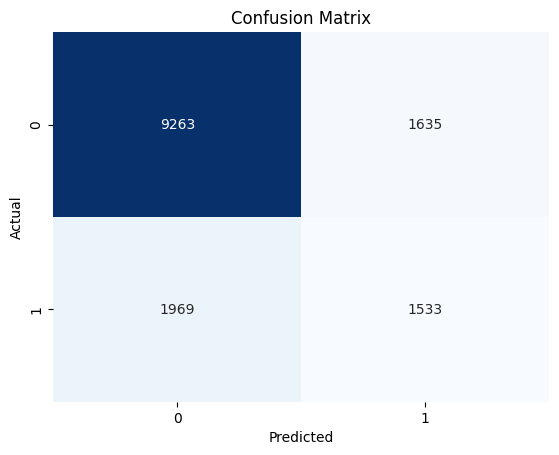

In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_imputed, y_train)

y_pred = rf_classifier.predict(X_test_imputed)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

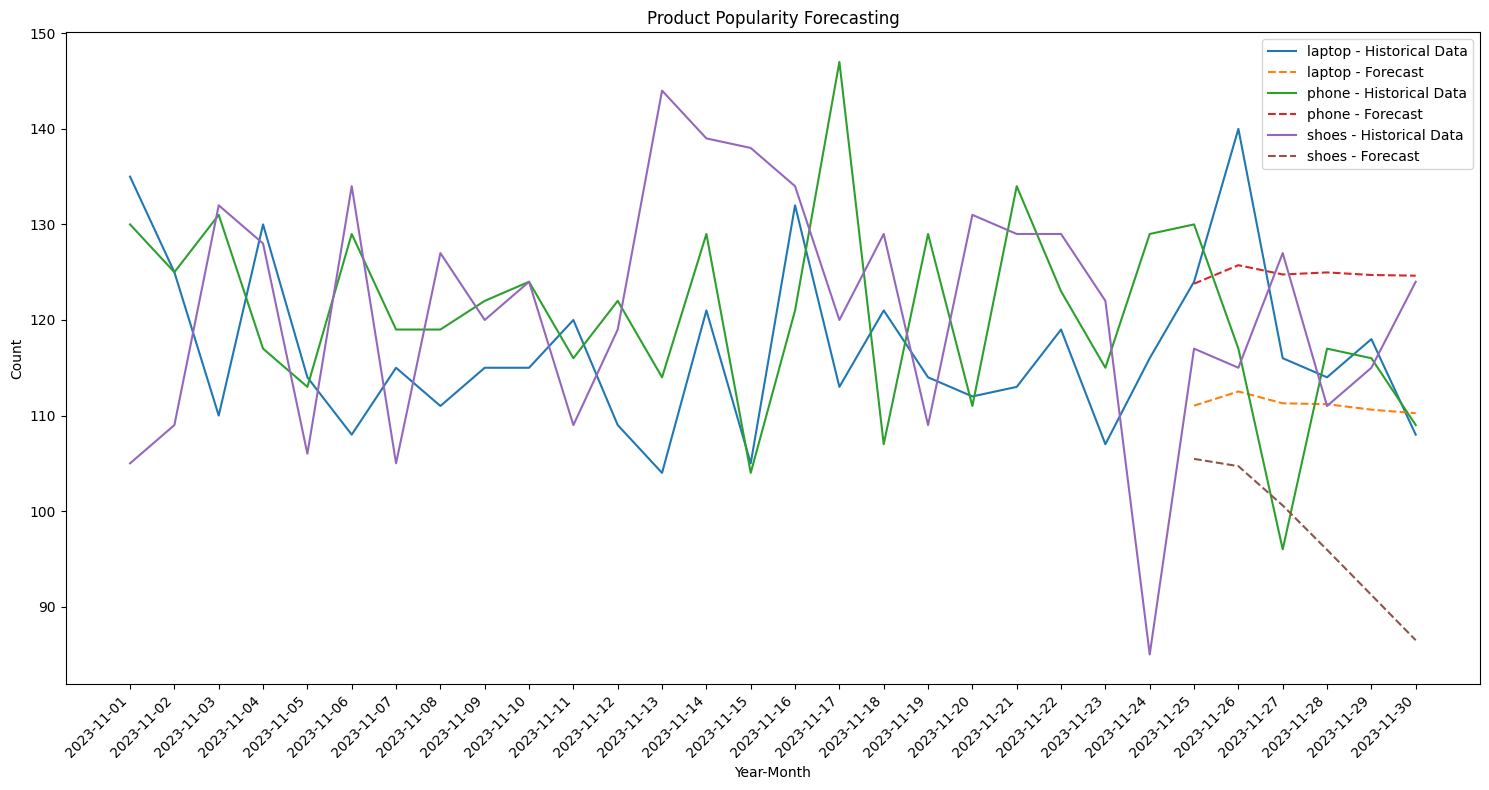

In [7]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

product_names = ['laptop', 'phone', 'shoes']
plt.figure(figsize=(15, 8))
for product_name in product_names:
    product_data = df[df['Product_Name'] == product_name]
    product_popularity = product_data.groupby('DateMonth').size()
    product_popularity.index = product_popularity.index.astype(str)
    train_size = int(len(product_popularity) * 0.8)
    train, test = product_popularity.iloc[:train_size], product_popularity.iloc[train_size:]
    order = (1, 2, 2)
    model = sm.tsa.ARIMA(train, order=order)
    model_fit = model.fit()
    future_steps = len(test)
    forecast_values = model_fit.forecast(steps=future_steps)

    plt.plot(product_popularity.index, product_popularity, label=f'{product_name} - Historical Data')
    plt.plot(test.index, forecast_values, linestyle='dashed', label=f'{product_name} - Forecast')

plt.title('Product Popularity Forecasting')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
